In [1]:
import pandas as pd

In [3]:
#carico il dataset in formato csv
dataset="https://covid.ourworldindata.org/data/owid-covid-data.csv"
ds=pd.read_csv(dataset)


In [5]:
print(f"Numero di righe nel dataset: {ds.shape[0]}")
print(f"Numero di colonne nel dataset: {ds.shape[1]}")


Numero di righe nel dataset: 429435
Numero di colonne nel dataset: 67


In [6]:
# Riepilogo dei metadati per verificare la veridicità del comando precedente
print("\nInformazioni riguardanti il dataset:")
print(ds.info())




Informazioni riguardanti il dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed             

In [8]:
# Filtra solo i dati che effettivamente mi sono utili (anche se non son sicuro sull utilità del location per l'esercizio 2 ma mi serviranno per i prossimi) 
ds= ds[['continent' , 'icu_patients_per_million' , 'icu_patients' , 'location' , 'date', 'total_cases', 'new_cases_per_million'  , 'new_cases' , 'hosp_patients' , 'total_cases_per_million']]
# Ripulisco le righe vuote nella sezione continente poichè se non svolgo questo passaggio non mi riesce a dare dei dati giusti 
ds= ds.dropna(subset=['continent'])
ds= ds.dropna(subset=['date'])
ds= ds.dropna(subset=['total_cases'])


In [9]:
# Raggruppo i dati per ogni continente e calcolo direttamente il totale dei casi 
casi_continenti= ds.groupby('continent')['total_cases'].sum()


In [10]:
# CalcolO i casi mondiali 
casi_mondiali= ds['total_cases'].sum()



In [11]:
# Calcolo percentuale rispetto al totale mondiale del numero di casi
percentuale_totale= (casi_continenti / casi_mondiali) * 100


In [12]:
print("\nNumero dei casi mondiali:")
print(casi_mondiali)



Numero dei casi mondiali:
715697182101.0


In [13]:
print("\nPercentuale rispetto al totale mondiale:")
print(percentuale_totale)


Percentuale rispetto al totale mondiale:
continent
Africa            2.042328
Asia             35.233800
Europe           33.080567
North America    17.755229
Oceania           1.620525
South America    10.267551
Name: total_cases, dtype: float64


In [15]:
print(ds.columns)  # Lista di tutte le colonne nel DataFrame
print(ds.head())   # Prime righe per controllare i dati

Index(['continent', 'icu_patients_per_million', 'icu_patients', 'location',
       'date', 'total_cases', 'new_cases_per_million', 'new_cases',
       'hosp_patients', 'total_cases_per_million'],
      dtype='object')
  continent  icu_patients_per_million  icu_patients     location        date  \
0      Asia                       NaN           NaN  Afghanistan  2020-01-05   
1      Asia                       NaN           NaN  Afghanistan  2020-01-06   
2      Asia                       NaN           NaN  Afghanistan  2020-01-07   
3      Asia                       NaN           NaN  Afghanistan  2020-01-08   
4      Asia                       NaN           NaN  Afghanistan  2020-01-09   

   total_cases  new_cases_per_million  new_cases  hosp_patients  \
0          0.0                    0.0        0.0            NaN   
1          0.0                    0.0        0.0            NaN   
2          0.0                    0.0        0.0            NaN   
3          0.0                   

In [18]:
# Converto la colonna 'date' in formato datetime, ignorando errori e valori NaN
ds["date"] = pd.to_datetime(ds["date"])


In [21]:
ds["location"] == "Italy"

0         False
1         False
2         False
3         False
4         False
          ...  
429430    False
429431    False
429432    False
429433    False
429434    False
Name: location, Length: 391716, dtype: bool

In [22]:
ds["date"].dt.year == 2022

0         False
1         False
2         False
3         False
4         False
          ...  
429430    False
429431    False
429432    False
429433    False
429434    False
Name: date, Length: 391716, dtype: bool

In [23]:
italy_2022_ds = ds[(ds["location"] == "Italy") & 
                       (ds["date"].dt.year == 2022)]

In [24]:
print(italy_2022_ds)

       continent  icu_patients_per_million  icu_patients location       date  \
186002    Europe                    21.969        1297.0    Italy 2022-01-01   
186003    Europe                    22.342        1319.0    Italy 2022-01-02   
186004    Europe                    22.884        1351.0    Italy 2022-01-03   
186005    Europe                    23.578        1392.0    Italy 2022-01-04   
186006    Europe                    24.188        1428.0    Italy 2022-01-05   
...          ...                       ...           ...      ...        ...   
186362    Europe                     5.657         334.0    Italy 2022-12-27   
186363    Europe                     5.437         321.0    Italy 2022-12-28   
186364    Europe                     5.319         314.0    Italy 2022-12-29   
186365    Europe                     5.149         304.0    Italy 2022-12-30   
186366    Europe                     5.200         307.0    Italy 2022-12-31   

        total_cases  new_cases_per_mill

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
italy_2022_ds = italy_2022_ds.dropna(subset=["total_cases"])

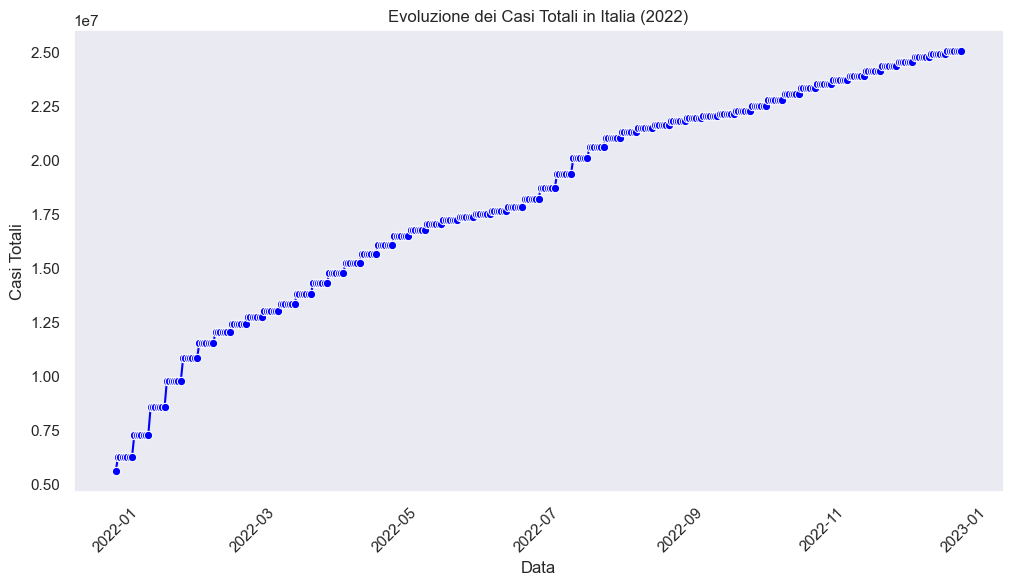

In [34]:
# Creazione del grafico con Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=italy_2022_ds, x="date", y="total_cases", marker="o", color="blue")
# Personalizzazione del grafico
plt.xlabel("Data")
plt.ylabel("Casi Totali")
plt.title("Evoluzione dei Casi Totali in Italia (2022)")
plt.xticks(rotation=45)  # Ruota le date per una migliore leggibilità
plt.grid()

In [39]:
#Rimuovo valori NaN dalle righe in 'new_cases'
italy_2022_ds = italy_2022_ds.dropna(subset=["new_cases"])
italy_2022_ds = italy_2022_ds[italy_2022_ds["new_cases"] >= 0]

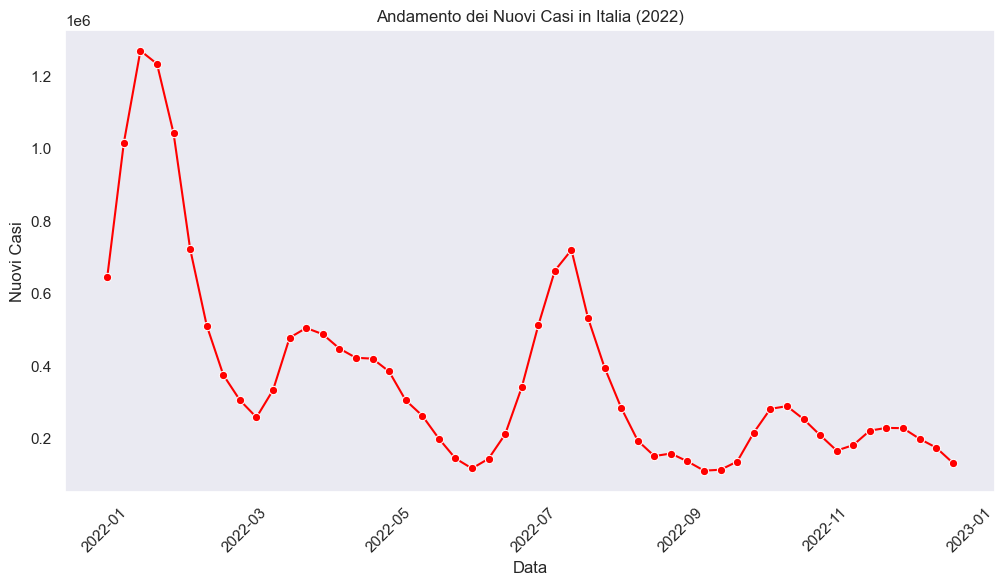

In [44]:
#Creazione del grafico Seaborn per il numero di nuovi casi rispetto alla data
plt.figure(figsize=(12, 6))
sns.lineplot(data=italy_2022_ds, x="date", y="new_cases", marker="o", color="red")
plt.xlabel("Data")
plt.ylabel("Nuovi Casi")
plt.title("Andamento dei Nuovi Casi in Italia (2022)")
plt.xticks(rotation=45)  # Ruota le date per leggibilità
plt.grid()

**Punto 4 esercizio** Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso) a. scrivere un breve commento a riguardo

In [46]:
# Filtro i dati per Italia, Germania, Francia periodo da mag 2022 aprile 2023
ds_filtered = ds[(ds['location'].isin(['Italy', 'Germany', 'France'])) & 
                 (ds['date'] >= '2022-05-01') & 
                 (ds['date'] <= '2023-04-30')]


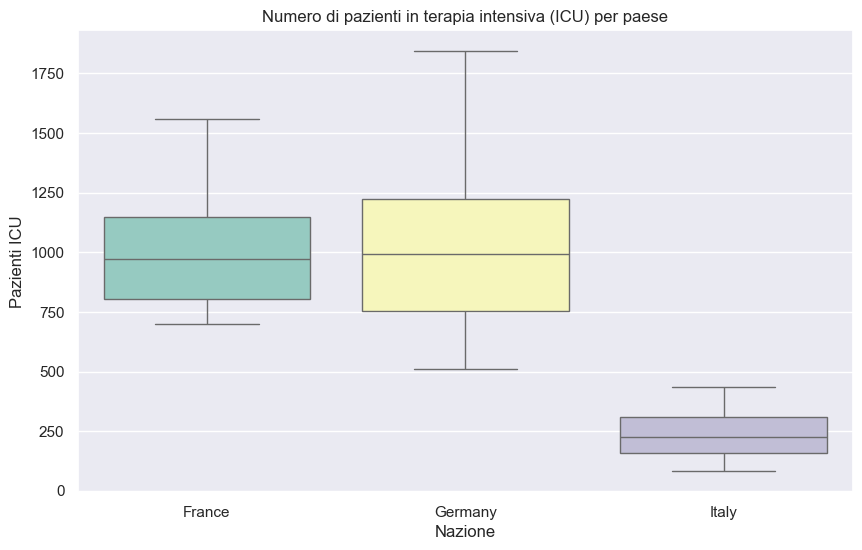

In [52]:
# Creo il Boxplot usando seaborn
plt.figure(figsize=(10,6))
sns.boxplot(data=ds_filtered, x='location', y='icu_patients', hue='location', palette='Set3')

# Personalizzare il grafico
plt.title("Numero di pazienti in terapia intensiva (ICU) per paese")
plt.ylabel("Pazienti ICU")
plt.xlabel("Nazione")
plt.show()

**Commento risultati dati boxplot** Riguardo al periodo indicato 05/22-04/23 in Italia c'è una percentuale considerevolmente più bassa rispetto al numero dei casi in Francia e in Germania, questo potrebbe indicare una risposta variabile rispetto agli eventi pandemici, come i picchi di infezioni o una maggiore pressione sugli ospedali o una gestione più critica dei casi.

**Punto 5** Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023: mostrare la somma dei pazienti ospitalizzati per ognuna; se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno


In [53]:
# Filtro i dati per Italia, Germania, Francia e Spagna nel 2023
ds_filtered_2023 = ds[(ds['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) &
                      (ds['date'].dt.year == 2023)]


In [57]:
# Sommo i pazienti ospitalizzati per ogni Paese
sum_hosp_pazienti = ds_filtered_2023.groupby('location')['hosp_patients'].sum()

In [58]:
print("Somma dei pazienti ospitalizzati per ogni paese nel 2023:")
print(sum_hosp_pazienti)

Somma dei pazienti ospitalizzati per ogni paese nel 2023:
location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64


In [59]:
# Verifico i dati nulli nella colonna 'hosp_patients'
null_data = ds_filtered_2023['hosp_patients'].isnull().sum()
print(f"\nNumero di dati nulli per 'hosp_patients': {null_data}")



Numero di dati nulli per 'hosp_patients': 843


**Commento sulla gestione dei dati nulli** I dati nulli sono molti e per questo non ci si può lavorare. I dati rimangono coerenti per Francia e Spagna, ma i dati in riferimento alla Germania sono mancanti, quindi andrebbero recuperati altrove per poter essere eventualmente sostituiti.
